In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', None)

import numpy as np
import pandas as pd 
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2

C:\Users\mahes\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


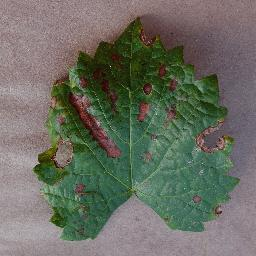

In [3]:
filepath ="IM2/6.jpg"
Image(filepath)

In [4]:
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

(65536, 3)


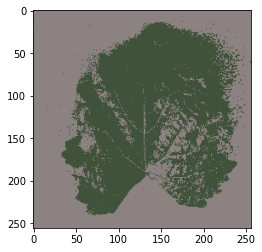

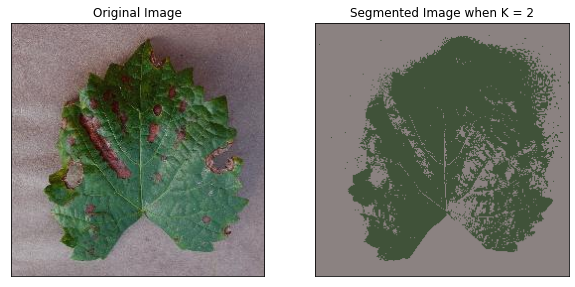

In [5]:
K=2
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.imshow(result_image)
plt.show()

figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
bin = result_image
print(bin.shape)
print(bin[0][12])
print(bin[50][150])

(256, 256, 3)
[139 130 129]
[64 82 57]


# Using Image with k=2

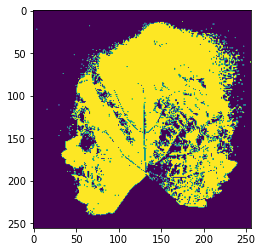

In [7]:
grayscale = cv2.cvtColor(result_image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

plt.imshow(thresh)

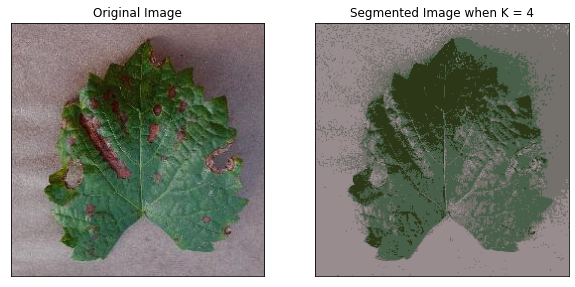

In [8]:
K=4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
    
## Reshaping 2D array to 3D array

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

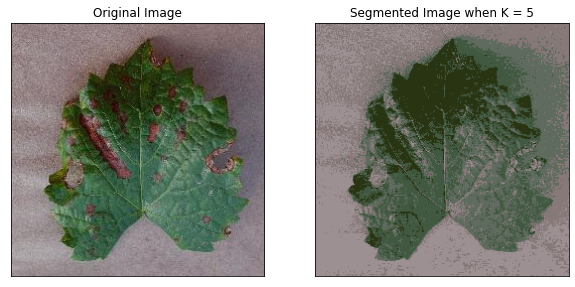

In [9]:
K=5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
    
## Reshaping 2D array to 3D array

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

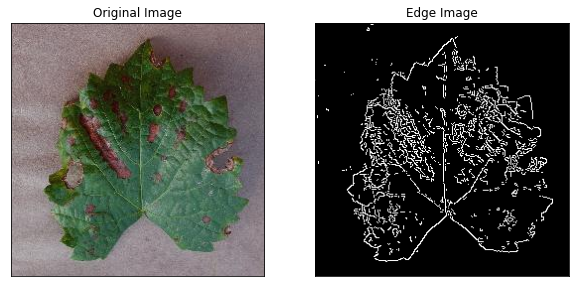

In [10]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

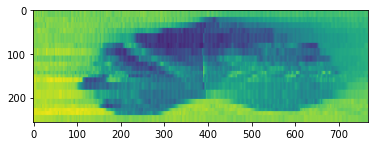

In [11]:
pic = np.float64(img/256)
nsamples, nx, ny = pic.shape
pic1 = pic.reshape((nsamples,nx*ny))
kmeans = KMeans(n_clusters=20, random_state=0).fit(pic1)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
plt.imshow(pic2show)

# Perfomance Matrix

In [12]:
from PIL import Image

  0%|          | 0/1 [00:00<?, ?it/s]

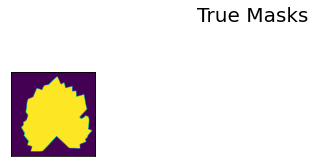

In [13]:
img_masks = []
mask_path = 'IM2/mask/'
mi = glob.glob(os.path.join(mask_path,"*.JPG"))
for files in tqdm(glob.glob(os.path.join(mask_path,"*.JPG"))):
  img = Image.open(files)
  img_masks.append(cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2GRAY))

plt.figure(figsize=(9,9))
for i, img in enumerate(img_masks[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("True Masks", fontsize=20)
plt.show()

In [14]:
def print_IOU(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    union = 0
    intersection = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 or seg_mask_img[i][j]!=0 :
                union+=1
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                intersection += 1
    
    iou = intersection/union

    print("IOU for image is ", iou)
    
def print_pixel_accuracy(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    correct_pixel = 0
    total_pixel = h*w

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                correct_pixel += 1
            if org_mask_img[i][j]==0 and seg_mask_img[i][j]==0:
                correct_pixel += 1
    
    accuracy = correct_pixel / total_pixel

    print("Pixel Accuracy for image  is ", accuracy)
    
def print_f1_score(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    overlap = 0

    pixel_1 = 0
    pixel_2 = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0 :
                overlap+=1
            if org_mask_img[i][j]!=0 :
                pixel_1 += 1
            if seg_mask_img[i][j]!=0:
                pixel_2 += 1
    
    f1 = 2*(overlap)/(pixel_2 + pixel_1)

    print("F1 score for image is ", f1)

In [15]:
print_IOU(thresh, img_masks[0])

IOU for image is  0.7106656889106168


In [16]:
print_pixel_accuracy(thresh, img_masks[0])

Pixel Accuracy for image  is  0.8374481201171875


In [17]:
print_f1_score(thresh, img_masks[0])

F1 score for image is  0.830864491545606


<ipython-input-22-0f6a505a3c58>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1),plt.imshow(thresh)


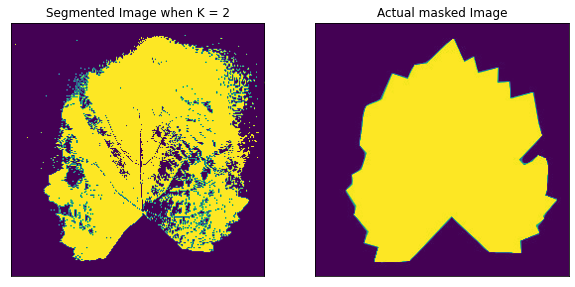

In [22]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 1),plt.imshow(thresh)
plt.title('Segmented Image when K = 2'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2),plt.imshow(img_masks[0])
plt.title('Actual masked Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
print_pixel_accuracy(thresh, img_masks[0])
print_IOU(thresh, img_masks[0])
print_f1_score(thresh, img_masks[0])

Pixel Accuracy for image  is  0.8374481201171875
IOU for image is  0.7106656889106168
F1 score for image is  0.830864491545606
